# Práctica 1

## Integrantes

* Garcia Saavedra Armando
* Orozco Guillen Jorge David
* Rodriguez Nuñez Diego Eduardo

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import pandas as pd

## Implementación del Mergesort

In [6]:
def merge(arr_i,arr_d):
    i=j=k=0
    arreglo = np.zeros(len(arr_i)+len(arr_d))
    while i < len(arr_i) and j < len(arr_d):
        if arr_i[i] < arr_d[j]:
            arreglo[k] = arr_i[i]
            i += 1
        else:
            arreglo[k] = arr_d[j]
            j += 1
        k += 1

    while i < len(arr_i):
        arreglo[k] = arr_i[i]
        i += 1
        k += 1

    while j < len(arr_d):
        arreglo[k] = arr_d[j]
        j += 1
        k += 1
    return arreglo

def sort(arr):
    if len(arr) <= 1:
        return arr
    
    mid= len(arr) // 2
    arr_i = sort(arr[:mid])
    arr_d = sort(arr[mid:])

    return merge(arr_i,arr_d)

## Implementación del Quicksort

In [7]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivote = arr[0]
        mayor = []
        menor = []
        for i in range(1,len(arr)):
            if arr[i] < pivote:
                menor.append(arr[i])
            else:
                mayor.append(arr[i])
        return quicksort(menor)+[pivote]+quicksort(mayor)

## Comparación de tiempos

In [8]:
tams = [10,100,1000,10000,100000,1000000,10000000,100000000]

mergesort_tiempos = []
quicksort_tiempos = []
numpysort_tiempos = []

for tam in tams:
    arr = np.random.randint(0,100000,tam)
    mergesort_tiempo = timeit.timeit('sort(arr)', number = 1, globals=globals())
    quicksort_tiempo = timeit.timeit('quicksort(arr)', number = 1, globals=globals())
    numpysort_tiempo = timeit.timeit('np.sort(arr)', number = 1, globals=globals())
    mergesort_tiempos.append(mergesort_tiempo)
    quicksort_tiempos.append(quicksort_tiempo)
    numpysort_tiempos.append(numpysort_tiempo)

In [9]:
mergesort_tiempos

[6.360001862049103e-05,
 0.0003714000340551138,
 0.004106399952434003,
 0.05198669998208061,
 0.6212766999960877,
 7.663067299989052,
 93.51218449999578,
 989.4278629000182]

In [10]:
quicksort_tiempos

[1.8300022929906845e-05,
 9.410001803189516e-05,
 0.0011733000283129513,
 0.014178499986883253,
 0.17594709998229519,
 3.7260208999505267,
 73.16651640000055,
 3696.5543431999977]

In [11]:
numpysort_tiempos

[0.00012500002048909664,
 2.7800037059932947e-05,
 0.00012129999231547117,
 0.00039540004217997193,
 0.0048540999996475875,
 0.0565420999773778,
 0.5472714999923483,
 5.437204300018493]

## Graficación de tiempos

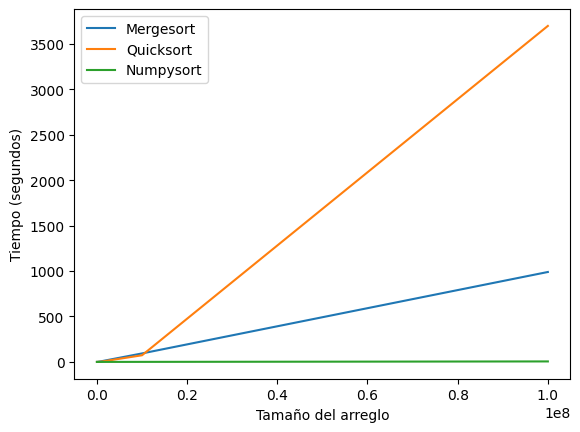

In [12]:
plt.plot(tams,mergesort_tiempos,label='Mergesort')
plt.plot(tams,quicksort_tiempos,label='Quicksort')
plt.plot(tams,numpysort_tiempos,label='Numpysort')
plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo (segundos)")
plt.legend()
plt.show()

## Tabulación de tiempos

In [13]:
data = {
    'Tiempos Mergesort': mergesort_tiempos,
    'Tiempos Quicksort': quicksort_tiempos,
    'Tiempos Numpysort': numpysort_tiempos,
    'Tamaños de los arreglos': tams
}

df= pd.DataFrame(data)
df.set_index('Tamaños de los arreglos',inplace=True)
df

,Tiempos Mergesort,Tiempos Quicksort,Tiempos Numpysort
Tamaños de los arreglos,,,
10,0.000064,0.000018,0.000125
100,0.000371,0.000094,0.000028
1000,0.004106,0.001173,0.000121
10000,0.051987,0.014178,0.000395
100000,0.621277,0.175947,0.004854
1000000,7.663067,3.726021,0.056542
10000000,93.512184,73.166516,0.547271
100000000,989.427863,3696.554343,5.437204


# Conclusión

Esta primera práctica fue bastante interesante, ya que ha sido de nuestros primeros acercamientos a python, sus librerías y el uso de sus funciones. Tambien el hecho de conocer otros algoritmos e irse dando cuenta de la eficiencia qué tienen para resolver los problemas, dado que muchas veces nos vamos por la manera más intuitiva y la que parece más sencilla pero al manipular grandes cantidades de datos siempre será mejor un algoritmo más eficiente, de igual manera el implementar otros códigos ayuda a desarrollar nuestra lógica al programar, ya que en el mundo laboral nuestro trabajo necesitará de esos conocimientos y habilidades.